In [1]:
from data_preparation import make_dataset, load_dataset, add_channel, normalize, to_tensor, random_flip, random_gaussian_noise, random_uniform_noise, random_gaussian_or_uniform_noise, random_translation, compose
from utils import get_random_image_label_pair
from unet import ConvBlock, Downsample, UNet
import matplotlib.pyplot as plt
import torch.nn as nn
import torchvision.transforms.v2 as transforms_v2
import numpy as np
import random
from functools import partial


In [2]:
train_input_data_dir = r"C:\Users\aless\OneDrive\Desktop\Ale\personal\projects\pip2_segmentation\data\train\raw"
train_label_data_dir = r"C:\Users\aless\OneDrive\Desktop\Ale\personal\projects\pip2_segmentation\data\train\label"
val_input_data_dir = r"C:\Users\aless\OneDrive\Desktop\Ale\personal\projects\pip2_segmentation\data\validation\raw"
val_label_data_dir = r"C:\Users\aless\OneDrive\Desktop\Ale\personal\projects\pip2_segmentation\data\validation\label"
test_input_data_dir = r"C:\Users\aless\OneDrive\Desktop\Ale\personal\projects\pip2_segmentation\data\test\raw"
test_label_data_dir = r"C:\Users\aless\OneDrive\Desktop\Ale\personal\projects\pip2_segmentation\data\test\label"

In [3]:
# i, l = load_dataset(input_data_dir, label_data_dir, stack_axis=0)
# i1,l1 = get_random_image_label_pair(i,l)
# i2,l2 = add_channel(i1, l1, axis_to_use=0)
# i3,l3 = normalize(i2,l2)
# i4,l4 = to_tensor(i3,l3)
# conblck = nn.Conv2d(1, 1, kernel_size=3, padding=2)
# i5 = conblck(i4)
# fig, ax = plt.subplots(1,2)
# ax[0].imshow(i5.detach().numpy()[0,...])
# ax[1].imshow(l4[0,...])


In [4]:
data__augmentation__transformations = [random_flip, random_translation, random_gaussian_or_uniform_noise, add_channel, to_tensor]
trafos = trafos = partial(compose, transforms=data__augmentation__transformations)

#create the train and validation datasets
train_dataset = make_dataset(train_input_data_dir, train_label_data_dir, transform=trafos, shuffle_data=True, stack_axis=0)
val_dataset = make_dataset(val_input_data_dir, val_label_data_dir, transform=trafos, shuffle_data=True, stack_axis=0)
test_dataset = make_dataset(test_input_data_dir, test_label_data_dir, transform=trafos, shuffle_data=True, stack_axis=0)

print(type(train_dataset))
print(type(val_dataset))
print(type(test_dataset))



<class 'data_preparation.DatasetWithTransform'>
<class 'data_preparation.DatasetWithTransform'>
<class 'data_preparation.DatasetWithTransform'>


<class 'torch.Tensor'>
torch.Size([1, 256, 256])
<class 'torch.Tensor'>
torch.Size([1, 256, 256])
<class 'torch.Tensor'>
torch.Size([1, 256, 256])


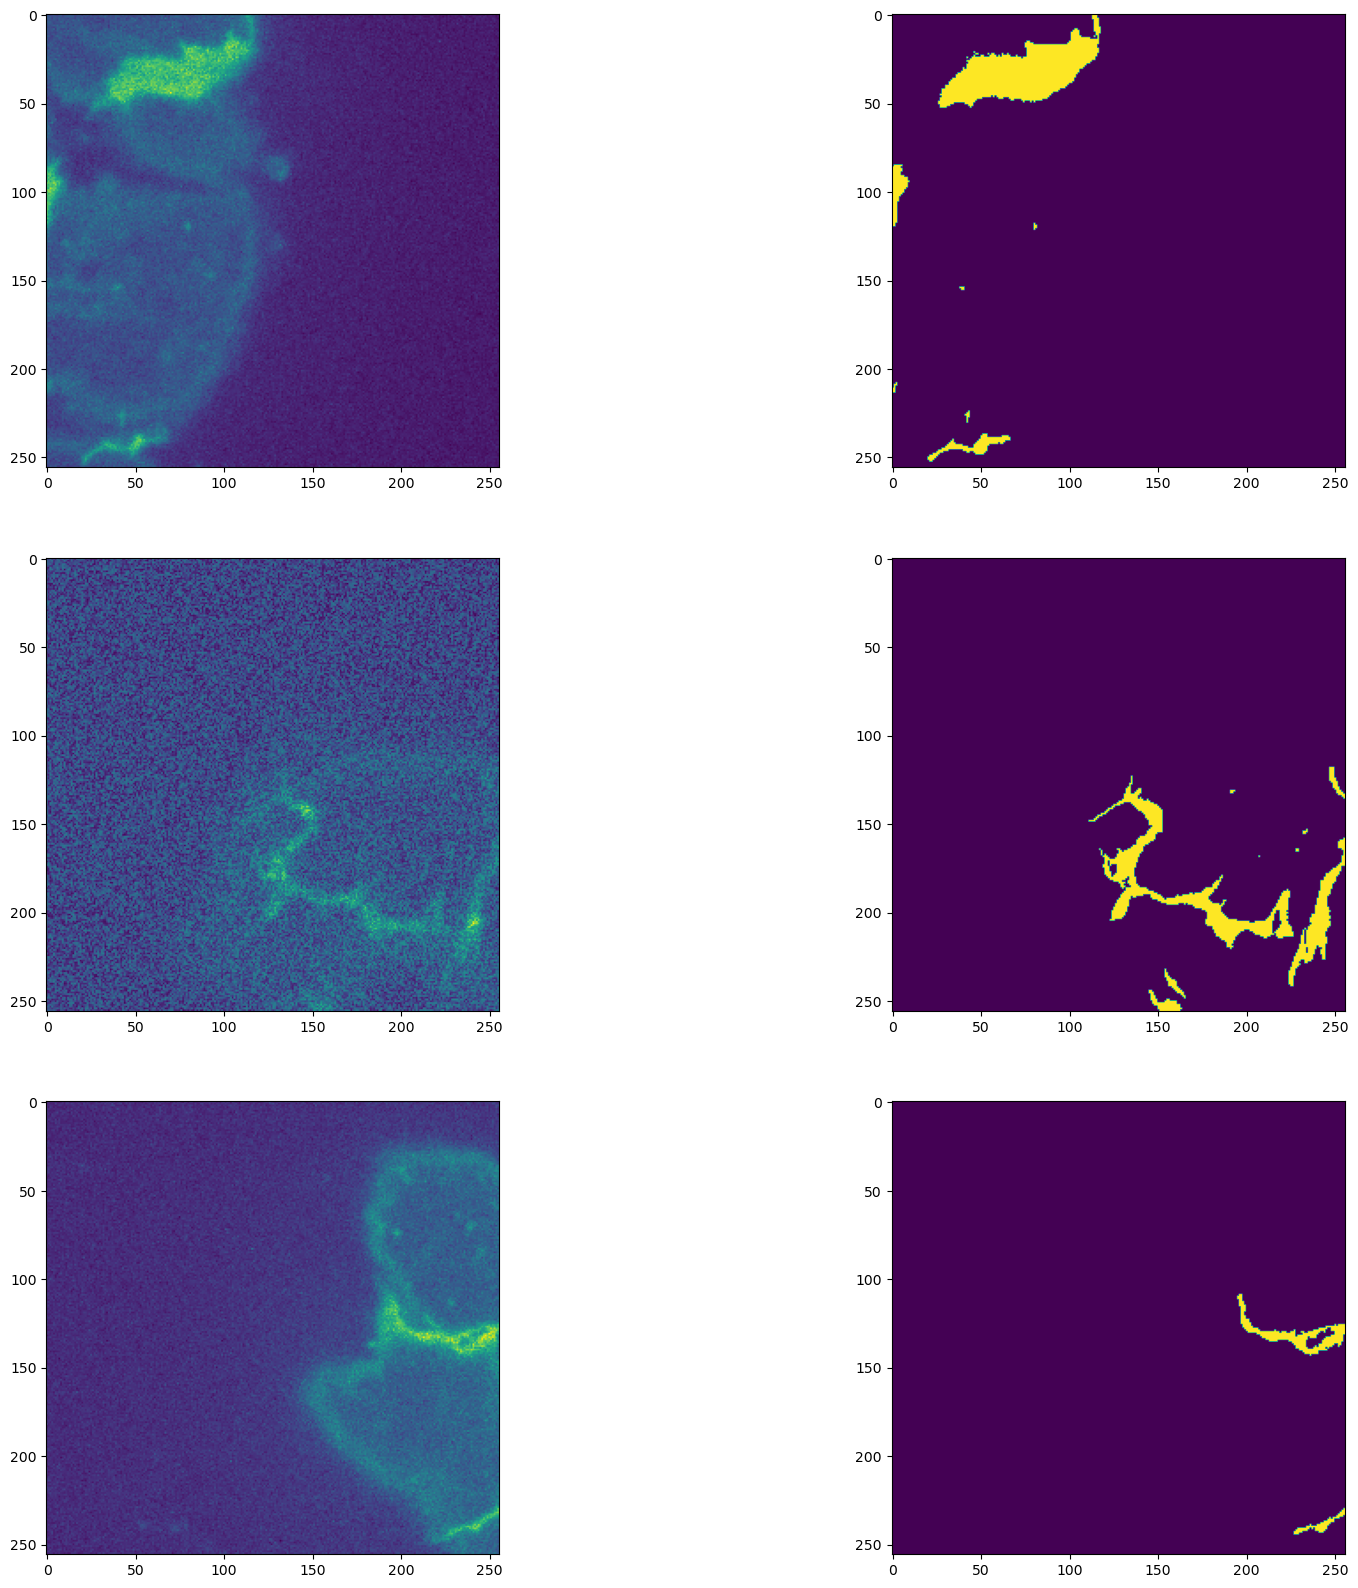

In [5]:
#get a random item from the train dataset
train_random_index = random.choice(range(train_dataset.__len__()))
train_data_item, train_label_item = train_dataset.__getitem__(train_random_index)
print(type(train_data_item))
print(train_data_item.shape)

val_random_index = random.choice(range(val_dataset.__len__()))
val_data_item, val_label_item = val_dataset.__getitem__(val_random_index)
print(type(val_data_item))
print(val_data_item.shape)

test_random_index = random.choice(range(test_dataset.__len__()))
test_data_item, test_label_item = test_dataset.__getitem__(test_random_index)
print(type(test_data_item))
print(test_data_item.shape)

fig, ax = plt.subplots(3,2, figsize=(20,20))
ax[0][0].imshow(train_data_item.detach().numpy()[0,...])
ax[0][1].imshow(train_label_item.detach().numpy()[0,...])

ax[1][0].imshow(val_data_item.detach().numpy()[0,...])
ax[1][1].imshow(val_label_item.detach().numpy()[0,...])

ax[2][0].imshow(test_data_item.detach().numpy()[0,...])
ax[2][1].imshow(test_label_item.detach().numpy()[0,...])


<class 'numpy.ndarray'>
(256, 256)
float32
<class 'numpy.ndarray'>
(256, 256)
float32
<class 'numpy.ndarray'>
(256, 256)
float32
<class 'numpy.ndarray'>
(256, 256)
float32
<class 'numpy.ndarray'>
(256, 256)
float32
<class 'numpy.ndarray'>
(256, 256)
float32


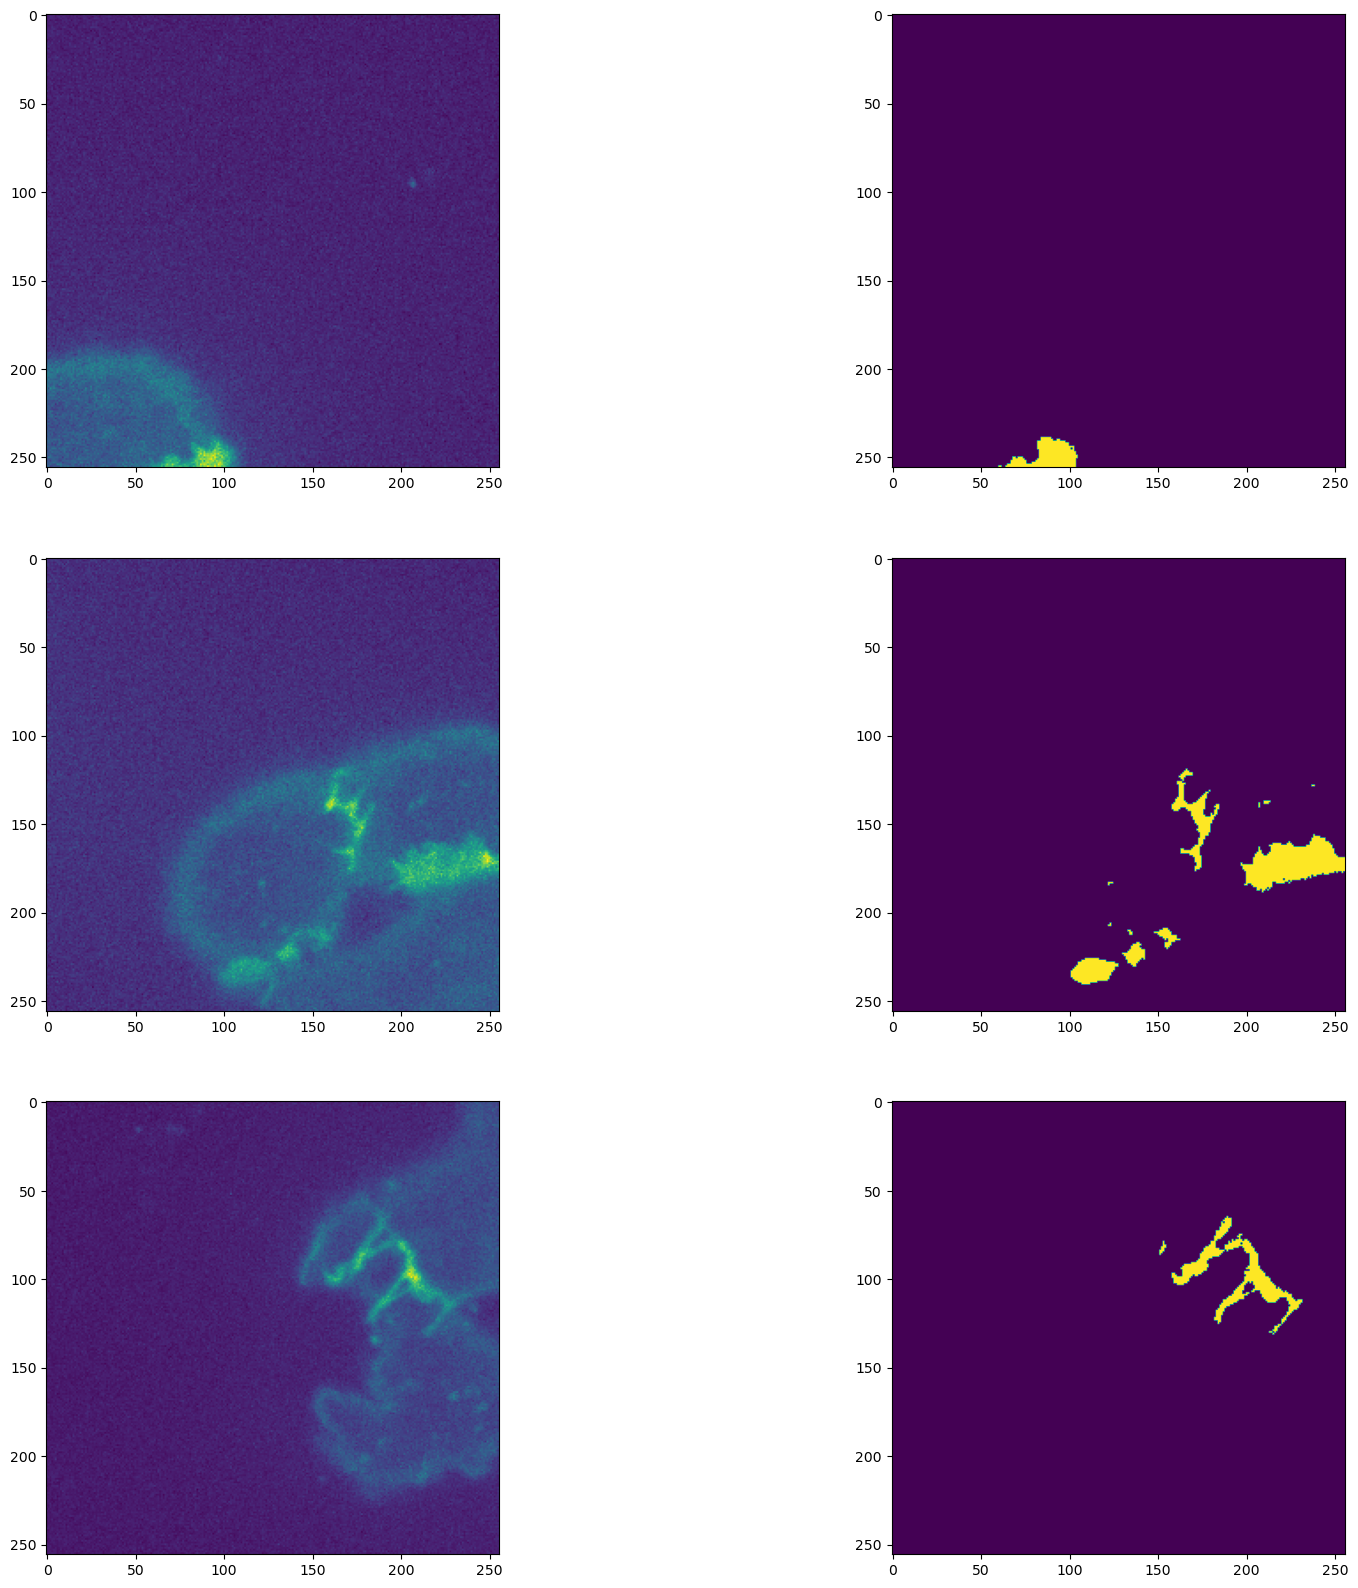

In [6]:
def print_info(train_img, train_lab, val_img, val_lab, test_img, test_lab):


def plot_my_translations(train_img, train_lab, val_img, val_lab, test_img, test_lab, my_ax):
    my_ax[0][0].imshow(train_img)
    my_ax[0][1].imshow(train_lab)
    my_ax[1][0].imshow(val_img)
    my_ax[1][1].imshow(val_lab)
    my_ax[2][0].imshow(test_img)
    my_ax[2][1].imshow(test_lab)

train_data_set_images, train_data_set_labels = load_dataset(train_input_data_dir, train_label_data_dir)
val_data_set_images, val_data_set_labels = load_dataset(val_input_data_dir, val_label_data_dir)
test_data_set_images, test_data_set_labels = load_dataset(test_input_data_dir, test_label_data_dir)

train_data_item_np, train_label_item_np = get_random_image_label_pair(train_data_set_images, train_data_set_labels)
val_data_item_np, val_label_item_np = get_random_image_label_pair(val_data_set_images, val_data_set_labels)
test_data_item_np, test_label_item_np = get_random_image_label_pair(test_data_set_images, test_data_set_labels)

print(type(train_data_item_np))
print(train_data_item_np.shape)
print(train_data_item_np.dtype)
print(type(train_label_item_np))
print(train_label_item_np.shape)
print(train_label_item_np.dtype)

print(type(val_data_item_np))
print(val_label_item_np.shape)
print(val_label_item_np.dtype)
print(type(val_label_item_np))
print(val_label_item_np.shape)
print(val_label_item_np.dtype)

print(type(test_data_item_np))
print(test_label_item_np.shape)
print(test_label_item_np.dtype)
print(type(test_label_item_np))
print(test_label_item_np.shape)
print(test_label_item_np.dtype)

fig1, ax1 = plt.subplots(3,2, figsize=(20,20))

plot_my_translations(train_data_item_np, train_label_item_np,
                     val_data_item_np, val_label_item_np,
                     test_data_item_np, test_label_item_np,
                     my_ax=ax1)


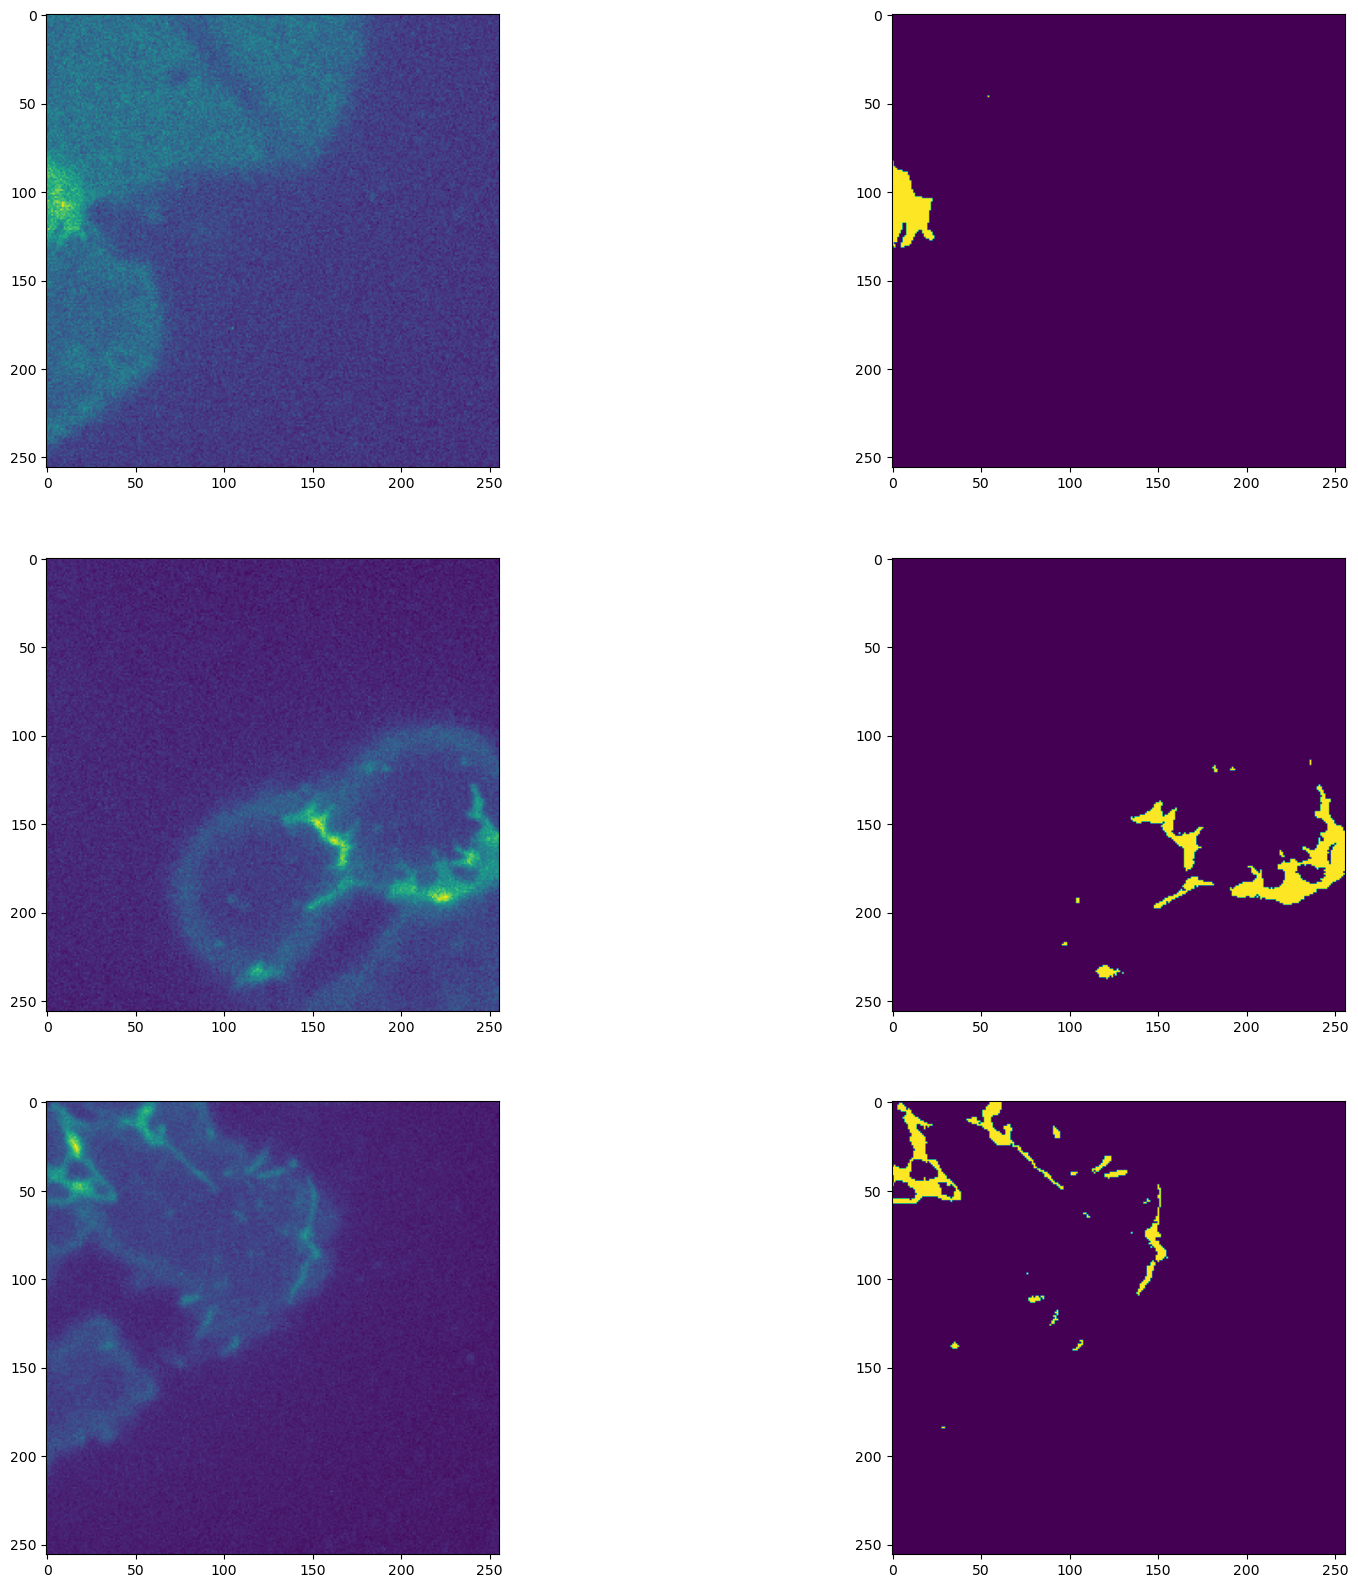

In [7]:
train_data_item_np_fl, train_label_item_np_fl = random_flip(train_data_item_np, train_label_item_np)

val_data_item_np_fl, val_label_item_np_fl = random_flip(val_data_item_np, val_label_item_np)

test_data_item_np_fl, test_label_item_np_fl = random_flip(test_data_item_np, test_label_item_np)



fig2, ax2 = plt.subplots(3,2, figsize=(20,20))

plot_my_translations(train_data_item_np_fl, train_label_item_np_fl,
                     val_data_item_np_fl, val_label_item_np_fl,
                     test_data_item_np_fl, test_label_item_np_fl,
                     my_ax=ax2)



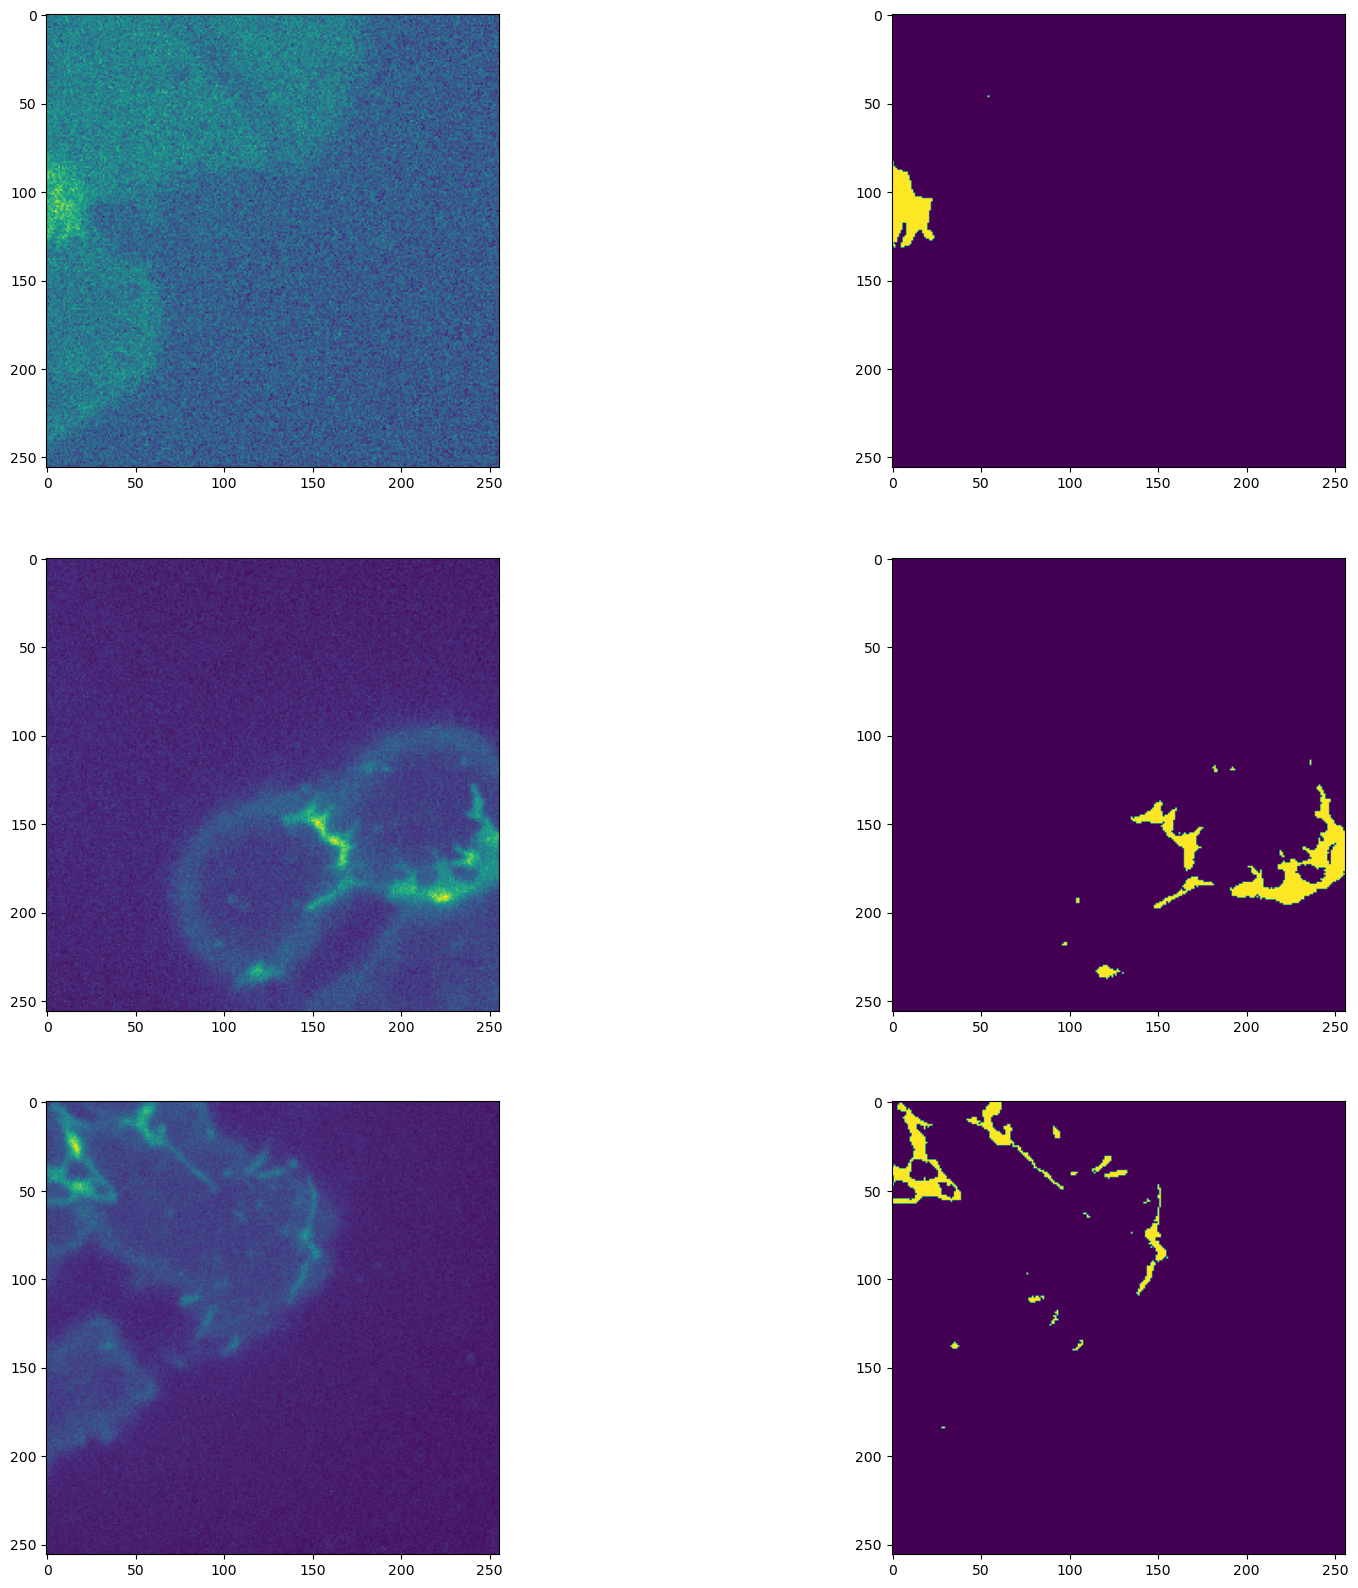

In [8]:
train_data_item_np_gau, train_label_item_np_gau = random_gaussian_noise(train_data_item_np, train_label_item_np)

val_data_item_np_gau, val_label_item_np_gau = random_gaussian_noise(val_data_item_np, val_label_item_np)

test_data_item_np_gau, test_label_item_np_gau = random_gaussian_noise(test_data_item_np, test_label_item_np)

fig3, ax3 = plt.subplots(3,2, figsize=(20,20))

plot_my_translations(train_data_item_np_gau, train_label_item_np_gau,
                     val_data_item_np_gau, val_label_item_np_gau,
                     test_data_item_np_gau, test_label_item_np_gau,
                     my_ax=ax3)



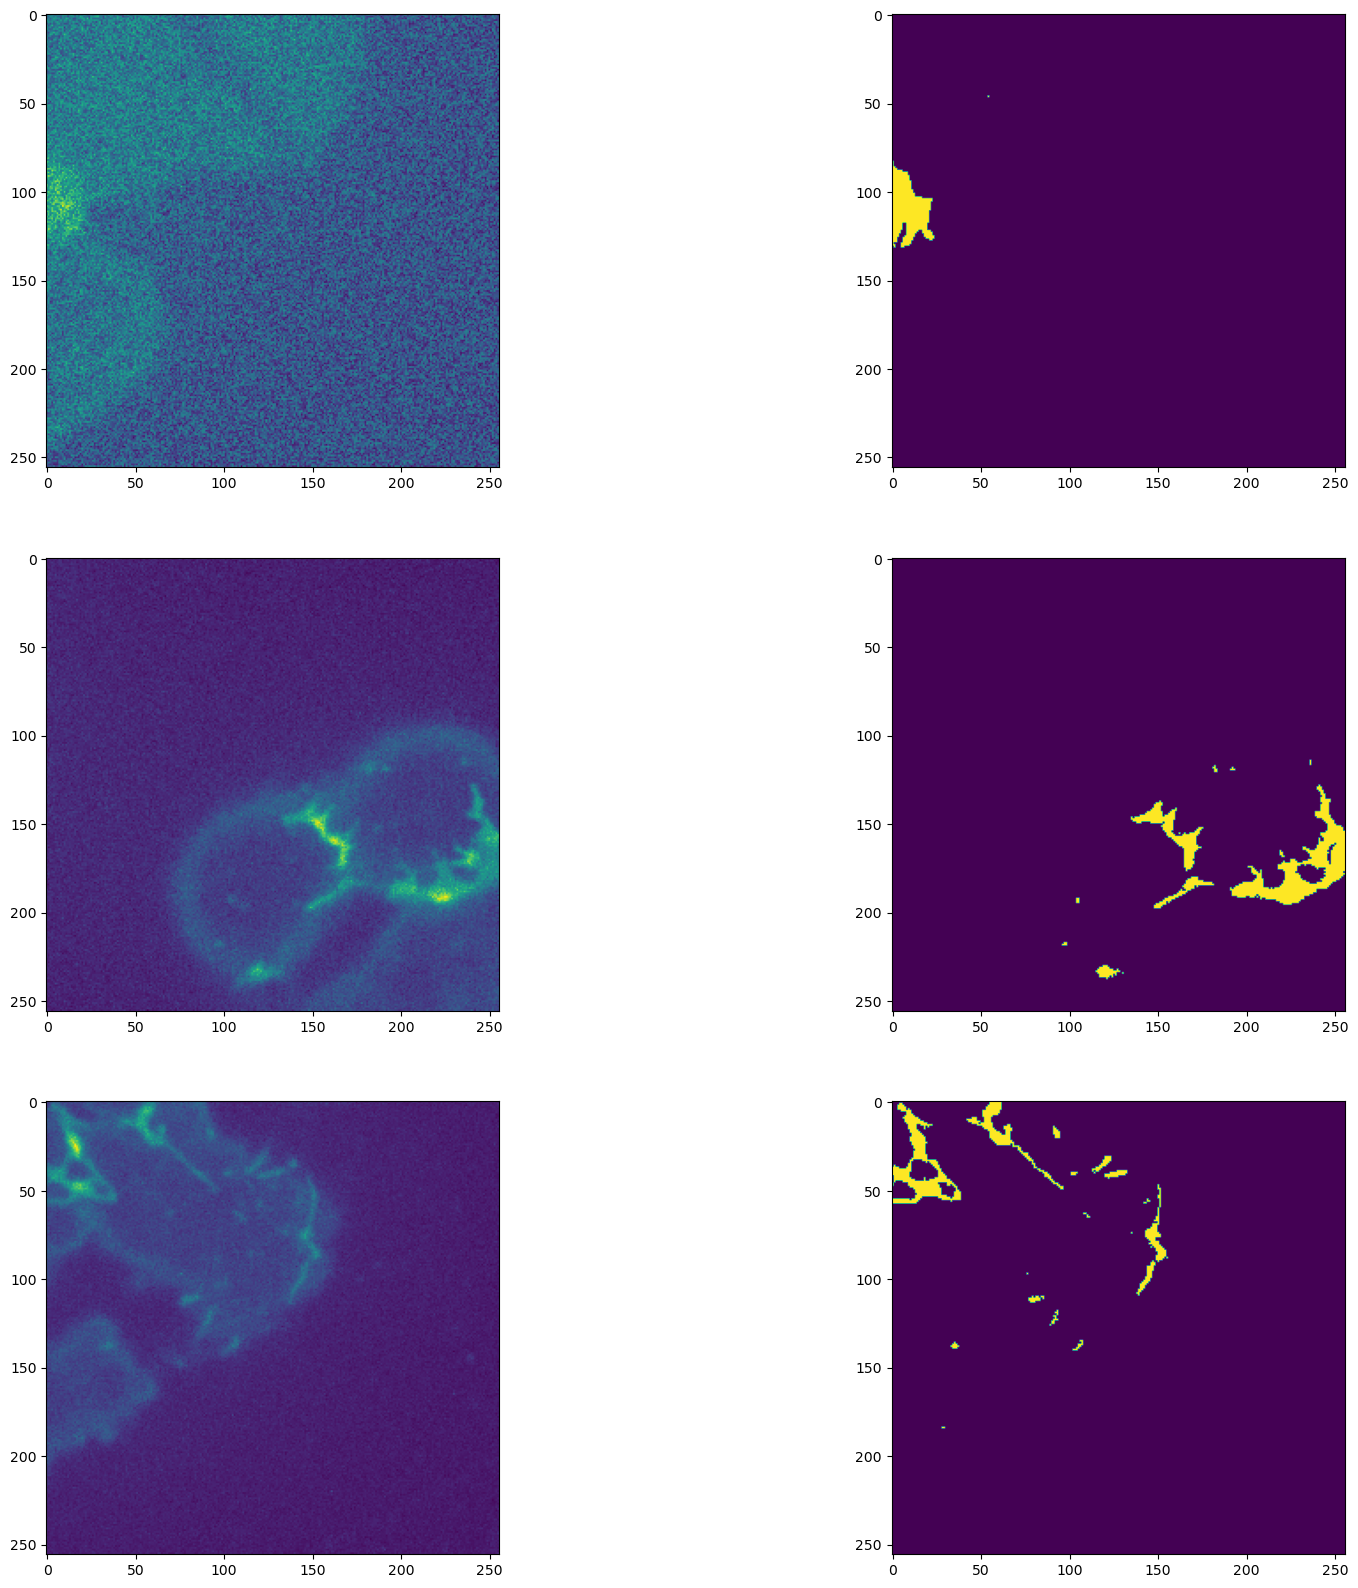

In [9]:
train_data_item_np_uni, train_label_item_np_uni = random_uniform_noise(train_data_item_np, train_label_item_np)

val_data_item_np_uni, val_label_item_np_uni = random_uniform_noise(val_data_item_np, val_label_item_np)

test_data_item_np_uni, test_label_item_np_uni = random_uniform_noise(test_data_item_np, test_label_item_np)

fig4, ax4 = plt.subplots(3,2, figsize=(20,20))

plot_my_translations(train_data_item_np_uni, train_label_item_np_uni,
                     val_data_item_np_uni, val_label_item_np_uni,
                     test_data_item_np_uni, test_label_item_np_uni,
                     my_ax=ax4)


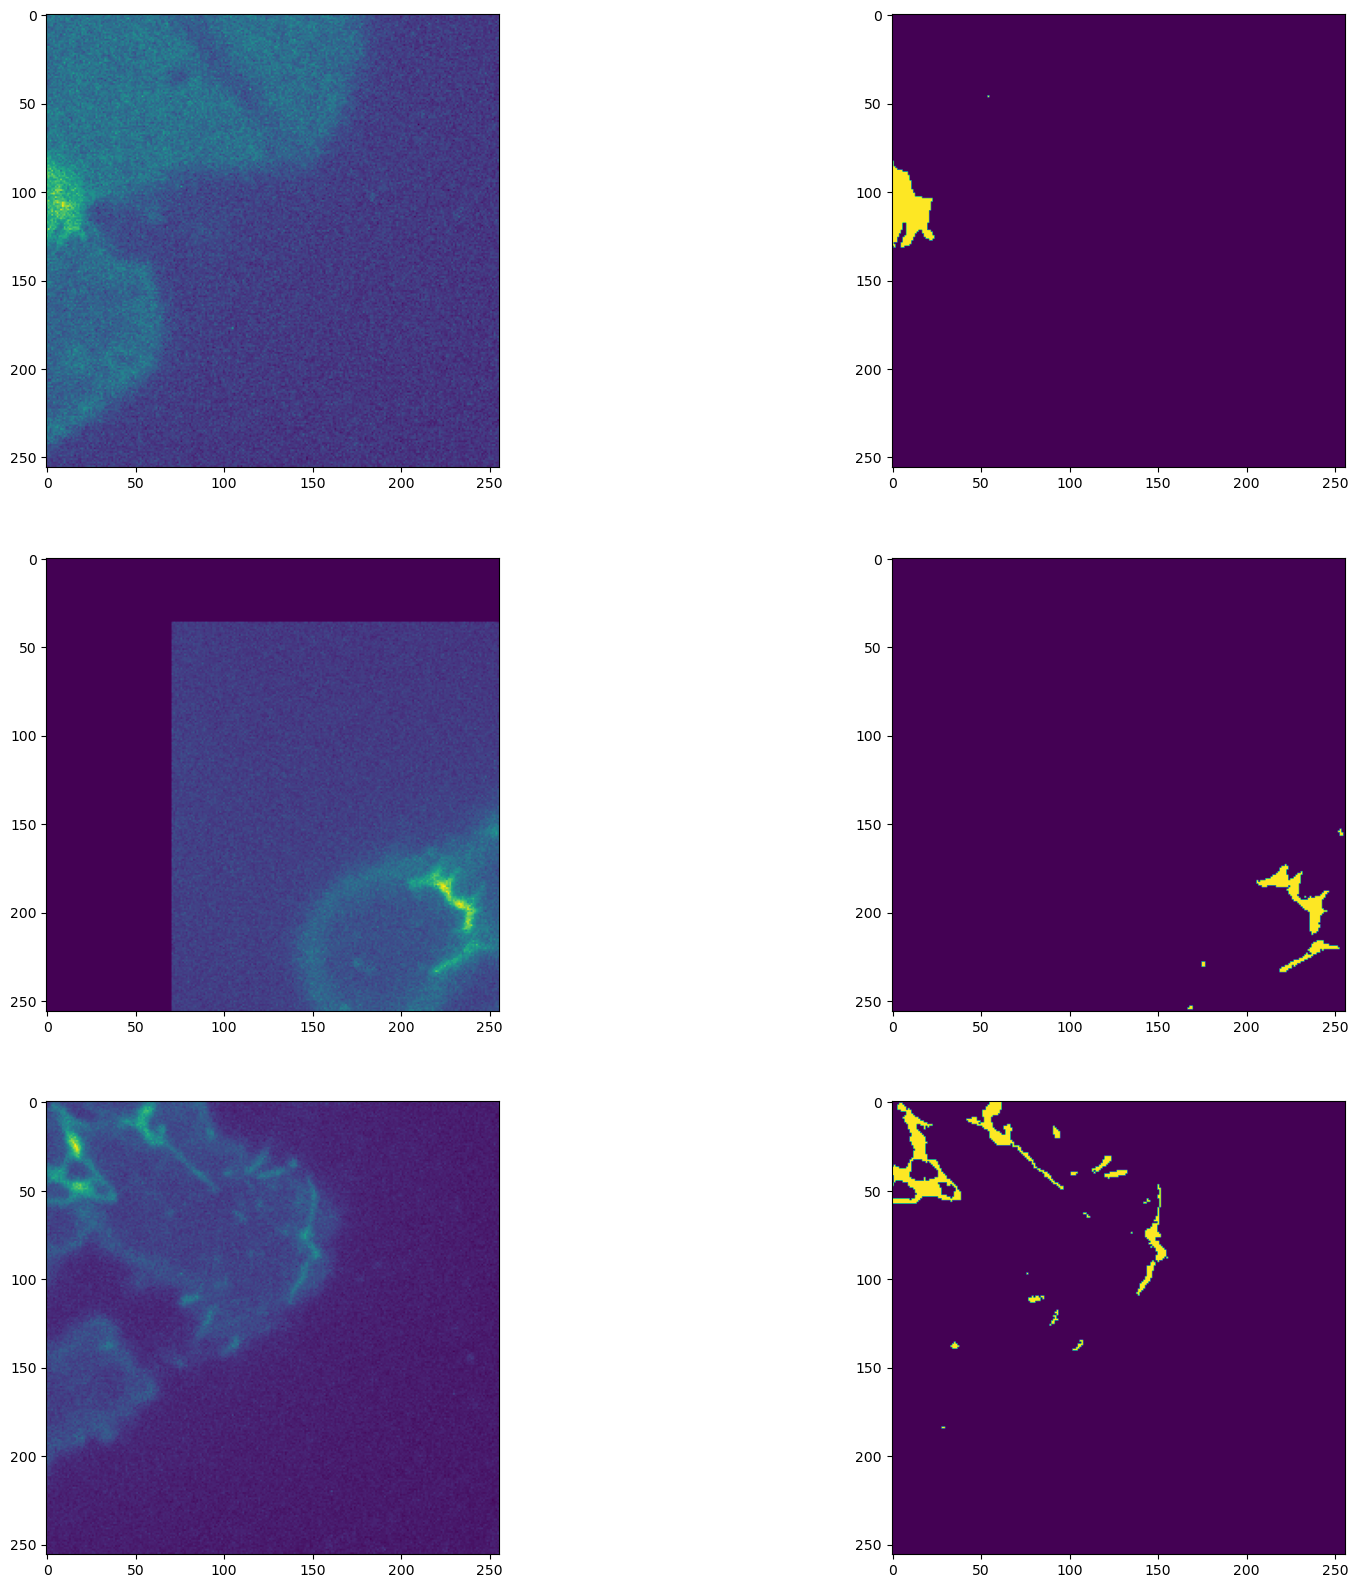

In [10]:
train_data_item_np_shf, train_label_item_np_shf = random_translation(train_data_item_np, train_label_item_np)

val_data_item_np_shf, val_label_item_np_shf = random_translation(val_data_item_np, val_label_item_np)

test_data_item_np_shf, test_label_item_np_shf = random_translation(test_data_item_np, test_label_item_np)

fig5, ax5 = plt.subplots(3,2, figsize=(20,20))

plot_my_translations(train_data_item_np_shf, train_label_item_np_shf,
                     val_data_item_np_shf, val_label_item_np_shf,
                     test_data_item_np_shf, test_label_item_np_shf,
                     my_ax=ax5)

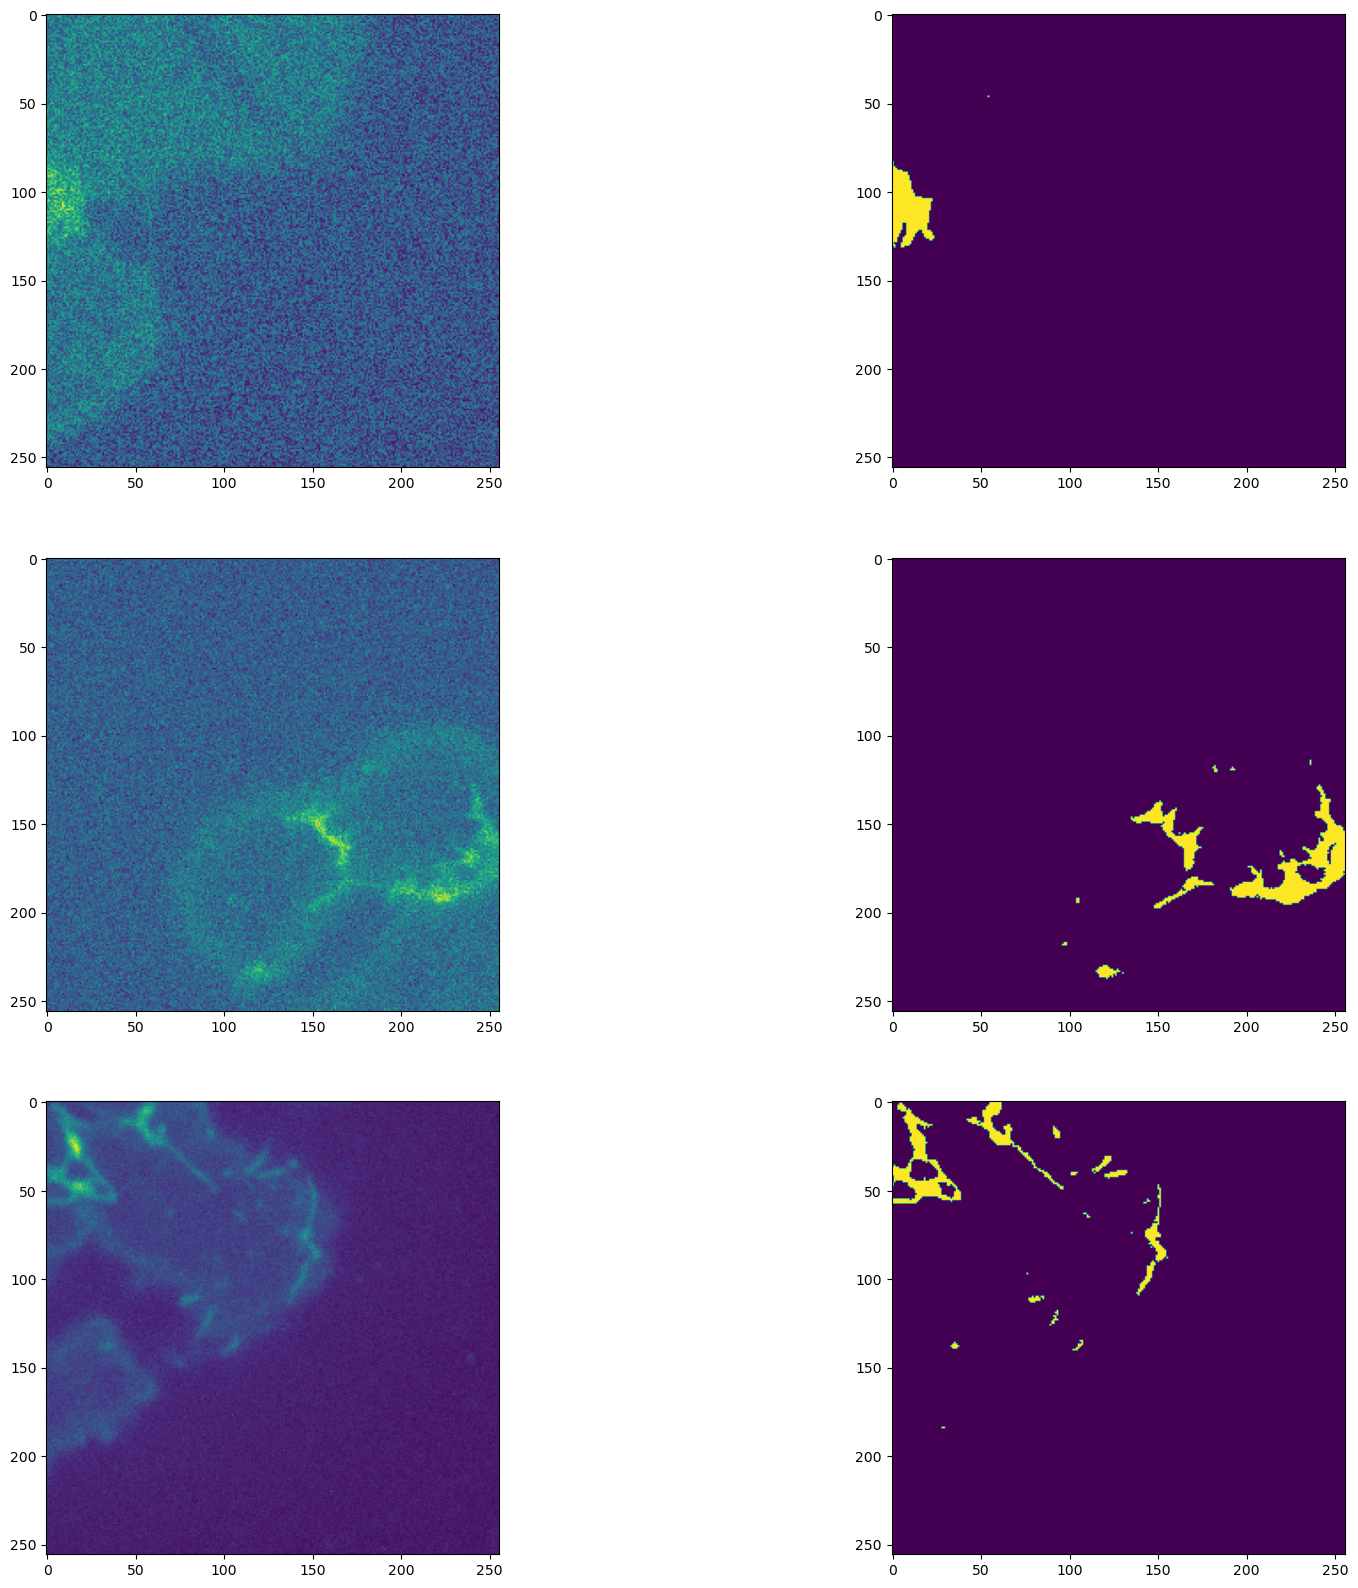

In [21]:
train_data_item_np_noi_se, train_label_item_np_noi_se = random_gaussian_or_uniform_noise(train_data_item_np, train_label_item_np)

val_data_item_np_noi_se, val_label_item_np_noi_se = random_gaussian_or_uniform_noise(val_data_item_np, val_label_item_np)

test_data_item_np_noi_se, test_label_item_np_noi_se = random_gaussian_or_uniform_noise(test_data_item_np, test_label_item_np)

fig6, ax6 = plt.subplots(3,2, figsize=(20,20))

plot_my_translations(train_data_item_np_noi_se, train_label_item_np_noi_se,
                     val_data_item_np_noi_se, val_label_item_np_noi_se,
                     test_data_item_np_noi_se, test_label_item_np_noi_se,
                     my_ax=ax6)

In [12]:
# #test composition of functions...
# data_augmentation_transformations = [random_flip, random_translation, random_gaussian_or_uniform_noise, add_channel, normalize, to_tensor]


# train_data_item_compose, train_label_item_compose = compose(train_data_item_np, train_label_item_np, data_augmentation_transformations)

# val_data_item_compose, val_label_item_compose = compose(val_data_item_np, val_label_item_np, data_augmentation_transformations)

# test_data_item_compose, test_label_item_compose = compose(test_data_item_np, test_label_item_np, data_augmentation_transformations)

# fig7, ax7 = plt.subplots(3,2, figsize=(20,20))

# ax7[0][0].imshow(train_data_item_compose.detach().numpy()[0,...])
# ax7[0][1].imshow(train_label_item_compose.detach().numpy()[0,...])

# ax7[1][0].imshow(val_data_item_compose.detach().numpy()[0,...])
# ax7[1][1].imshow(val_label_item_compose.detach().numpy()[0,...])

# ax7[2][0].imshow(test_data_item_compose.detach().numpy()[0,...])
# ax7[2][1].imshow(test_label_item_compose.detach().numpy()[0,...])



In [13]:
# #test downsampling
# test_downsampling = Downsample(downsample_factor=2)
# test_downsampling_for = test_downsampling.forward(test_conv_block_for)

# print(type(test_downsampling_for))
# print(test_downsampling_for.shape)

# fig2, ax2 = plt.subplots(1,2)
# ax2[0].imshow(test_downsampling_for.detach().numpy()[0,...])
# ax2[1].imshow(train_label_item[0,...])



In [14]:
# #test upsampling
# print(test_downsampling_for.shape)
# test_upsample = nn.Upsample(scale_factor=2, mode='nearest')
# test_upsample_for = test_upsample(test_downsampling_for)

# print(test_upsample_for.shape)
# plt.imshow(test_upsample_for.detach().numpy()[0,...])

In [15]:
# #test crop and concat    

# print(test_conv_block_for.size())
# print(test_downsampling_for.size())


# x_target_size = test_conv_block_for.size()[:-2] + test_downsampling_for.size()[-2:]
# # x_target_size = test_conv_block_for.size()[-2:]
# print(x_target_size)

# for a,b in zip(test_conv_block_for.size(), x_target_size):
#     print("--- dim", a, b)
#     print("diff", a-b)
#     print("offset", (a-b)//2)

# print("===")
# print("===")
# offset_s = tuple((a - b) // 2 for a, b in zip(test_conv_block_for.size(), x_target_size))
# print(offset_s)
# print("===")
# print("===")

# for o,s in zip(test_conv_block_for.size(), offset_s):
#     print("-.-.", o,s)
#     sl = slice(o, o+s)
#     print(sl)

# slice_s = tuple(slice(o, o+s) for o,s in zip(offset_s, x_target_size))
# print(slice_s)


# print("")
# print("")
# print("")
# print("===")
# print("===")
# print("===")
# print("===")
# res_ult = test_conv_block_for[slice_s]
# print(test_conv_block_for.size())
# print(res_ult.size())



In [16]:
# #add dimension to train_data_item to mimic the minibatch
# input_with_all_dim = train_data_item.unsqueeze_(0)
# print(input_with_all_dim.size())

In [17]:
# #test the UNet class
# unet_network = UNet(depth=3,
#                     in_channels=1,
#                     out_channels=1,
#                     final_activation="Sigmoid",
#                     num_fmaps=64,
#                     fmap_inc_factor=4,
#                     downsample_factor=2,
#                     kernel_size=3,
#                     padding="same",
#                     upsample_mode="nearest")

# print(input_with_all_dim.size())
# test_unet = unet_network(input_with_all_dim)
# print("=== FINAL")
# print(test_unet.size())


In [18]:
# print(test_unet.dtype)

In [19]:
# numpy_test_unet = test_unet.detach().numpy()[0,0,...]
# print(np.unique(numpy_test_unet))

# fig3, ax3 = plt.subplots(1,2)
# ax3[0].imshow(numpy_test_unet)
# ax3[1].imshow(train_label_item[0,...])
